# 04 Machine Learning

•	Chuẩn bị dữ liệu train/test.

•	Huấn luyện mô hình phân loại (Random Forest, Logistic Regression).

•	Đánh giá và phân tích feature importance.


# Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV

In [3]:
df = pd.read_csv(r"D:\weather-tourism-project\data\processed_weather_data.csv",  sep=",", header=0)

In [4]:
df.head()

,date,hour,temp,rain_amount,humidity,wind,cloud,precip,city,comfort_index,label
0,2024-01-01,0,18.4,0.0,92,6.9,3,0.0,HaNoi,67.0,Trung bình
1,2024-01-01,1,18.0,0.0,95,6.1,9,0.0,HaNoi,67.0,Trung bình
2,2024-01-01,2,17.7,0.0,97,5.3,96,0.0,HaNoi,58.0,Trung bình
3,2024-01-01,3,17.8,0.0,97,4.9,100,0.0,HaNoi,58.0,Trung bình
4,2024-01-01,4,18.7,0.2,93,7.0,41,0.2,HaNoi,58.5,Trung bình


In [5]:
# Chuyển đổi cột 'date' sang kiểu datetime nếu chưa phải
df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
# Chọn dữ liệu mùa hè
df_summer = df[(df['month'] >= 4) & (df['month'] <= 8)].copy()

# Chọn đặc trưng và nhãn
features = ['temp', 'humidity', 'rain_amount',
            'wind', 'cloud', 'precip', 'hour']
X = df_summer[features]
y = df_summer['label']

# Chia dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Huấn luyện mô hình Random Forest

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Dự đoán và đánh giá

In [7]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Trung bình       0.99      0.99      0.99      1211
         Tốt       0.99      1.00      0.99      1810
         Xấu       1.00      0.67      0.80         3

    accuracy                           0.99      3024
   macro avg       0.99      0.88      0.93      3024
weighted avg       0.99      0.99      0.99      3024



# Ma trận nhầm lẫn

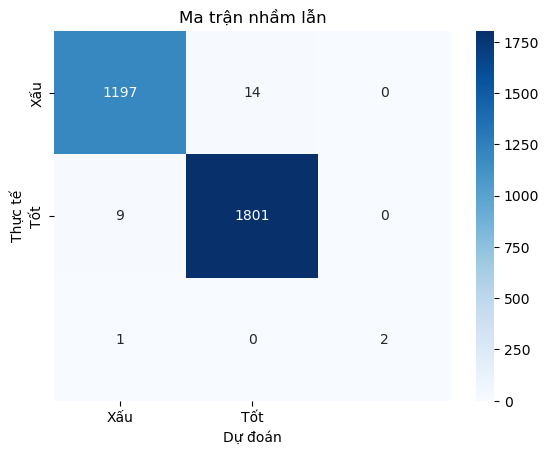

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Xấu', 'Tốt'], yticklabels=['Xấu', 'Tốt'])
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

# Đánh giá quan trọng đặc trưng

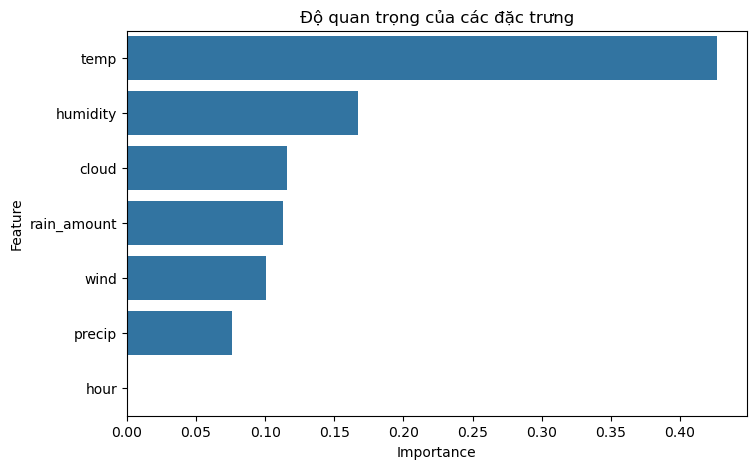

In [9]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Độ quan trọng của các đặc trưng")
plt.show()

# Lưu mô hình (tuỳ chọn)

In [ ]:
import joblib
joblib.dump(model, "weather_travel_model.pkl")

In [11]:
import scipy.stats as stats
# ANOVA - So sánh comfort index giữa các thành phố
anova_result = stats.f_oneway(
    df_summer[df_summer['city'] == 'HaNoi']['comfort_index'],
    df_summer[df_summer['city'] == 'DaNang']['comfort_index'],
    df_summer[df_summer['city'] == 'HoChiMinh']['comfort_index']
)
print("ANOVA p-value:", anova_result.pvalue)

# T-test - So sánh comfort index giữa hai năm (nếu có)
df_summer['year'] = pd.to_datetime(df_summer['date']).dt.year
if df_summer['year'].nunique() >= 2:
    y2024 = df_summer[df_summer['year'] == 2024]['comfort_index']
    y2025 = df_summer[df_summer['year'] == 2025]['comfort_index']
    t_stat, p_val = stats.ttest_ind(y2024, y2025, equal_var=False)
    print("T-test p-value:", p_val)

# Kiểm định chi-square giữa thành phố và nhãn
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_summer['city'], df_summer['label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square p-value:", p)


ANOVA p-value: 2.640998495222785e-32
T-test p-value: 0.3992289669435741
Chi-square p-value: 4.9530096579621095e-26
